<a href="https://colab.research.google.com/github/bbhavii/Project-Work/blob/main/Performing_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving AIDAWeek10_InClass_Survey.csv to AIDAWeek10_InClass_Survey.csv


In [ ]:
df = pd.read_csv("AIDAWeek10_InClass_Survey.csv")
display(df)
df.drop('Observation', axis=1, inplace=True)
display(df)

,Observation,Climate,Housing,Healthcare,Crime,Transportation,Education,Arts,Recreation,Economic
0,1,521,6200,237,923,4031,2757,996,1405,7633
1,2,575,8138,1656,886,4883,2438,5564,2632,4350
2,3,468,7339,618,970,2531,2560,237,859,5250
3,4,476,7908,1431,610,6883,3399,4655,1617,5864
4,5,659,8393,1853,1483,6558,3026,4496,2612,5727
...,...,...,...,...,...,...,...,...,...,...
324,325,562,8715,1805,680,3643,3299,1784,910,5040
325,326,535,6440,317,1106,3731,2491,996,2140,4986
326,327,540,8371,713,440,2267,2903,1022,842,4946
327,328,570,7021,1097,938,3374,2920,2797,1327,3894


,Climate,Housing,Healthcare,Crime,Transportation,Education,Arts,Recreation,Economic
0,521,6200,237,923,4031,2757,996,1405,7633
1,575,8138,1656,886,4883,2438,5564,2632,4350
2,468,7339,618,970,2531,2560,237,859,5250
3,476,7908,1431,610,6883,3399,4655,1617,5864
4,659,8393,1853,1483,6558,3026,4496,2612,5727
...,...,...,...,...,...,...,...,...,...
324,562,8715,1805,680,3643,3299,1784,910,5040
325,535,6440,317,1106,3731,2491,996,2140,4986
326,540,8371,713,440,2267,2903,1022,842,4946
327,570,7021,1097,938,3374,2920,2797,1327,3894


In [ ]:
X_std = StandardScaler().fit_transform(df)
display(df)


,Climate,Housing,Healthcare,Crime,Transportation,Education,Arts,Recreation,Economic
0,521,6200,237,923,4031,2757,996,1405,7633
1,575,8138,1656,886,4883,2438,5564,2632,4350
2,468,7339,618,970,2531,2560,237,859,5250
3,476,7908,1431,610,6883,3399,4655,1617,5864
4,659,8393,1853,1483,6558,3026,4496,2612,5727
...,...,...,...,...,...,...,...,...,...
324,562,8715,1805,680,3643,3299,1784,910,5040
325,535,6440,317,1106,3731,2491,996,2140,4986
326,540,8371,713,440,2267,2903,1022,842,4946
327,570,7021,1097,938,3374,2920,2797,1327,3894


In [ ]:
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix: \n', cov_matrix)

Covariance Matrix: 
 [[ 1.00304878  0.38746841  0.21395285  0.19297385  0.07936115  0.06471647
   0.22766619  0.21415997 -0.10038787]
 [ 0.38746841  1.00304878  0.45439081  0.13463087  0.27275053  0.19853732
   0.44993535  0.42357584  0.27025421]
 [ 0.21395285  0.45439081  1.00304878  0.30558826  0.47175096  0.49172865
   0.86843566  0.32638902  0.06948193]
 [ 0.19297385  0.13463087  0.30558826  1.00304878  0.28745214  0.07464314
   0.39067005  0.34567724  0.26078738]
 [ 0.07936115  0.27275053  0.47175096  0.28745214  1.00304878  0.33701686
   0.46622266  0.36582818  0.05942738]
 [ 0.06471647  0.19853732  0.49172865  0.07464314  0.33701686  1.00304878
   0.37441703  0.0780444   0.12006529]
 [ 0.22766619  0.44993535  0.86843566  0.39067005  0.46622266  0.37441703
   1.00304878  0.3798139   0.07590401]
 [ 0.21415997  0.42357584  0.32638902  0.34567724  0.36582818  0.0780444
   0.3798139   1.00304878  0.17405956]
 [-0.10038787  0.27025421  0.06948193  0.26078738  0.05942738  0.12006529
  

In [ ]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n',eig_vecs)
print('Eigen Values \n',eig_vals)
print(len(eig_vals))

Eigen Vectors 
 [[ 2.06413954e-01  2.17835308e-01  6.89955982e-01  1.37321246e-01
  -3.69149929e-01 -3.74604694e-01  8.47057741e-02  3.62308330e-01
   1.39135150e-03]
 [ 3.56521608e-01  2.50624000e-01  2.08172230e-01  5.11828708e-01
   2.33487781e-01  1.41639825e-01  2.30638624e-01 -6.13855131e-01
   1.36003402e-02]
 [ 4.60214647e-01 -2.99465282e-01  7.32492550e-03  1.47018320e-02
  -1.03240518e-01  3.73848037e-01 -1.38676115e-02  1.85676120e-01
  -7.16354893e-01]
 [ 2.81298380e-01  3.55342273e-01 -1.85104981e-01 -5.39050473e-01
  -5.23939687e-01 -8.09232850e-02 -1.86064572e-02 -4.30024765e-01
  -5.86084614e-02]
 [ 3.51150781e-01 -1.79604477e-01 -1.46376283e-01 -3.02903705e-01
   4.04348475e-01 -4.67591803e-01  5.83390970e-01  9.35986618e-02
   3.62945266e-03]
 [ 2.75292636e-01 -4.83382093e-01 -2.29702548e-01  3.35411034e-01
  -2.08819059e-01 -5.02169811e-01 -4.26181860e-01 -1.88667565e-01
   1.10840191e-01]
 [ 4.63054489e-01 -1.94789920e-01  2.64842979e-02 -1.01080391e-01
  -1.0509763

In [ ]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[:, i]) for i in range(len(eig_vals))]
eigen_pairs

[(3.4186829341737663,
  array([0.20641395, 0.35652161, 0.46021465, 0.28129838, 0.35115078,
         0.27529264, 0.46305449, 0.32788791, 0.13541225])),
 (1.217677313155327,
  array([ 0.21783531,  0.250624  , -0.29946528,  0.35534227, -0.17960448,
         -0.48338209, -0.19478992,  0.38447464,  0.47128328])),
 (1.1449592665579513,
  array([ 0.68995598,  0.20817223,  0.00732493, -0.18510498, -0.14637628,
         -0.22970255,  0.0264843 ,  0.05085264, -0.60731447])),
 (0.9237254999052622,
  array([ 0.13732125,  0.51182871,  0.01470183, -0.53905047, -0.30290371,
          0.33541103, -0.10108039, -0.18980082,  0.42176994])),
 (0.7555814784171866,
  array([-0.36914993,  0.23348778, -0.10324052, -0.52393969,  0.40434848,
         -0.20881906, -0.10509764,  0.52954058, -0.15962006])),
 (0.6324843418624428,
  array([-0.37460469,  0.14163983,  0.37384804, -0.08092329, -0.4675918 ,
         -0.50216981,  0.46188072, -0.08991578, -0.03260813])),
 (0.4945509144183733,
  array([ 0.08470577,  0.230

In [ ]:
tot = sum(eig_vals)
var_exp = [(i/tot) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained: ",cum_var_exp)        


Cumulative Variance Explained:  [ 37.8699089   51.35853297  64.0416346   74.27405486  82.64388684
  89.65013014  95.12843815  98.66219912 100.        ]


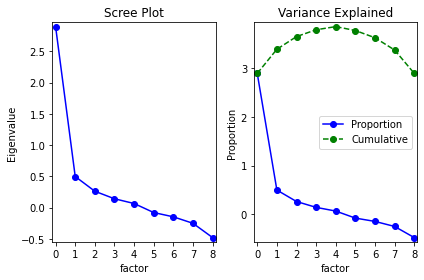

In [ ]:
from statsmodels.multivariate.factor import Factor
model = Factor(df).fit()
model.plot_scree()
plt.show()

In [ ]:
#extract principle component
from statsmodels.multivariate.pca import PCA
pc = PCA(df, ncomp=9, standardize=True, demean=True)

In [ ]:
#compute loadings on the variables
df_comp = pc.loadings.T
df_comp

,Climate,Housing,Healthcare,Crime,Transportation,Education,Arts,Recreation,Economic
comp_0,0.206414,0.356522,0.460215,0.281298,0.351151,0.275293,0.463054,0.327888,0.135412
comp_1,0.217835,0.250624,-0.299465,0.355342,-0.179604,-0.483382,-0.194790,0.384475,0.471283
comp_2,-0.689956,-0.208172,-0.007325,0.185105,0.146376,0.229703,-0.026484,-0.050853,0.607314
comp_3,0.137321,0.511829,0.014702,-0.539050,-0.302904,0.335411,-0.101080,-0.189801,0.421770
comp_4,-0.369150,0.233488,-0.103241,-0.523940,0.404348,-0.208819,-0.105098,0.529541,-0.159620
comp_5,0.374605,-0.141640,-0.373848,0.080923,0.467592,0.502170,-0.461881,0.089916,0.032608
comp_6,-0.084706,-0.230639,0.013868,0.018606,-0.583391,0.426182,-0.021525,0.627878,-0.149741
comp_7,-0.362308,0.613855,-0.185676,0.430025,-0.093599,0.188668,-0.203990,-0.150596,-0.404809
comp_8,0.001391,0.013600,-0.716355,-0.058608,0.003629,0.110840,0.685758,-0.025506,0.000438


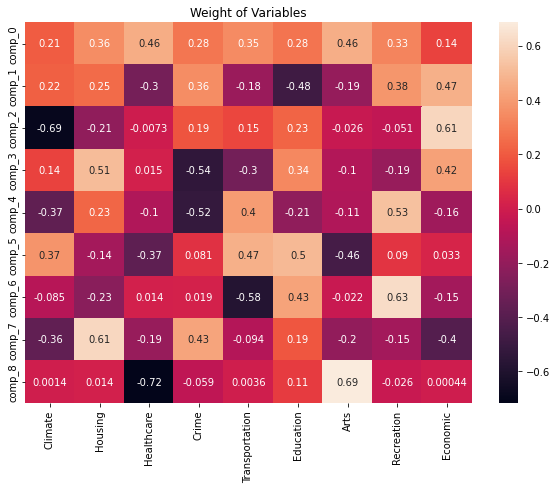

In [ ]:

plt.rcParams["figure.figsize"] = (10, 7)
plt.title('Weight of Variables')
#synth_data.dropna(inplace=True)
#sns.color_palette("cubehelix", as_cmap=True)
sns.heatmap(df_comp,annot=True);

plt.show();

In [ ]:
scores = pd.DataFrame(pc.factors)
display(scores)


,comp_0,comp_1,comp_2,comp_3,comp_4,comp_5,comp_6,comp_7,comp_8
0,-0.031110,0.044790,0.074247,0.029335,-0.035953,0.034618,-0.033322,-0.098083,0.055282
1,0.013154,0.003762,-0.059677,-0.063994,0.063420,-0.043706,-0.000935,-0.040999,-0.019364
2,-0.056095,0.003498,0.003791,-0.002660,-0.043230,-0.049654,-0.018833,0.043266,-0.014990
3,0.027239,-0.091086,0.056650,0.033003,0.048928,0.088395,-0.036071,-0.036373,0.050488
4,0.064281,0.016480,0.001020,-0.059350,-0.015176,0.089298,-0.012153,-0.014516,-0.048877
...,...,...,...,...,...,...,...,...,...
324,-0.004217,-0.082294,-0.011932,0.070438,-0.042670,0.024206,0.012507,0.030255,-0.063731
325,-0.033875,0.037076,-0.016503,-0.064179,0.006350,0.001934,0.020272,-0.006120,0.023047
326,-0.051090,-0.045350,-0.034005,0.077145,-0.019836,-0.023981,0.013437,0.013388,0.026393
327,-0.022889,-0.053889,-0.049725,-0.025076,-0.036629,0.001882,0.031702,0.038258,0.009172
